In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__)

(60000, 28, 28)
60000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[9 0 0 ... 3 0 5]
10000


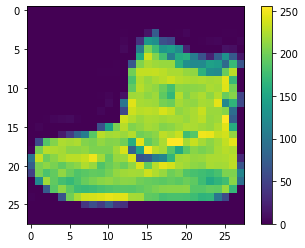

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(len(train_images))
# print(train_images)
print(train_images[0][0])
print(train_labels)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# after getting the output we see image scale value is 0 to 255
# For neural network value have to scale this value into 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0
# print(train_images.shape)
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# layers the model and then compile
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test accuracy : ', test_accuracy)

predictions = model.predict(test_images)
print(predictions[1])
print(np.argmax(predictions[1]))

# see input is correct or not
print(test_labels[1])

(60000, 28, 28)
60000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0

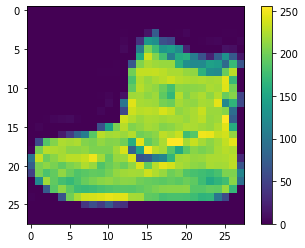

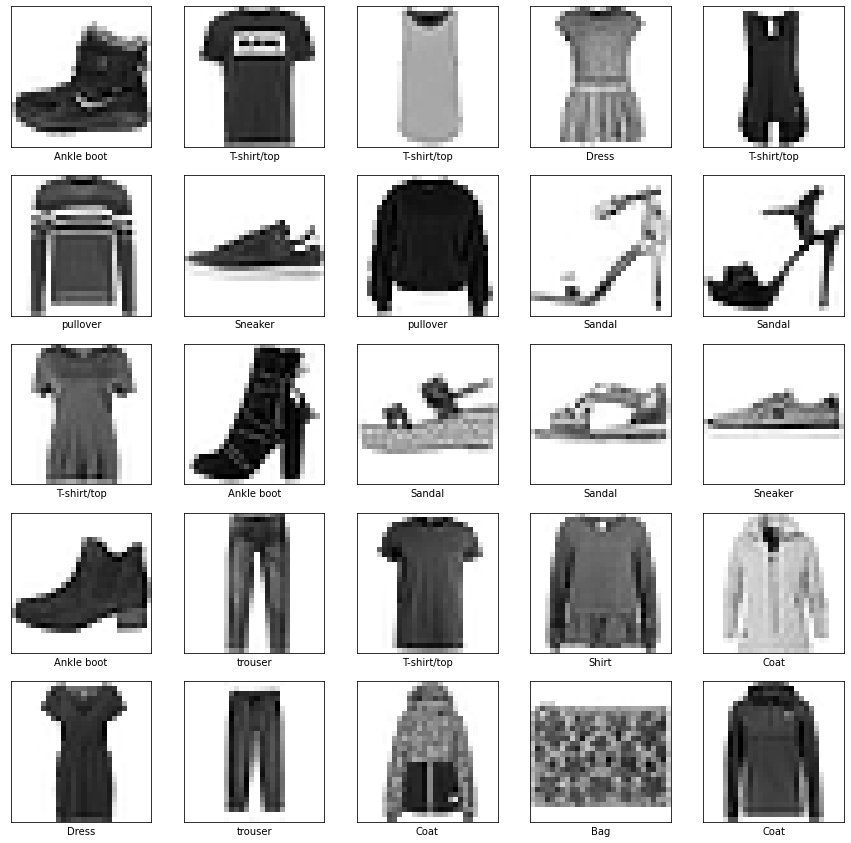

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 9.6068 - accuracy: 0.6739
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8712 - accuracy: 0.6967
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6315 - accuracy: 0.7718
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5631 - accuracy: 0.7948
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5078 - accuracy: 0.8244
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4890 - accuracy: 0.8320
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4664 - accuracy: 0.8394
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4698 - accuracy: 0.8399
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4630 - accuracy: 0.8412
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5994 

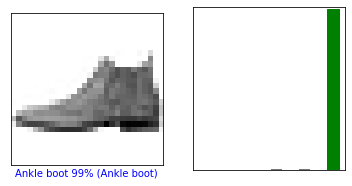

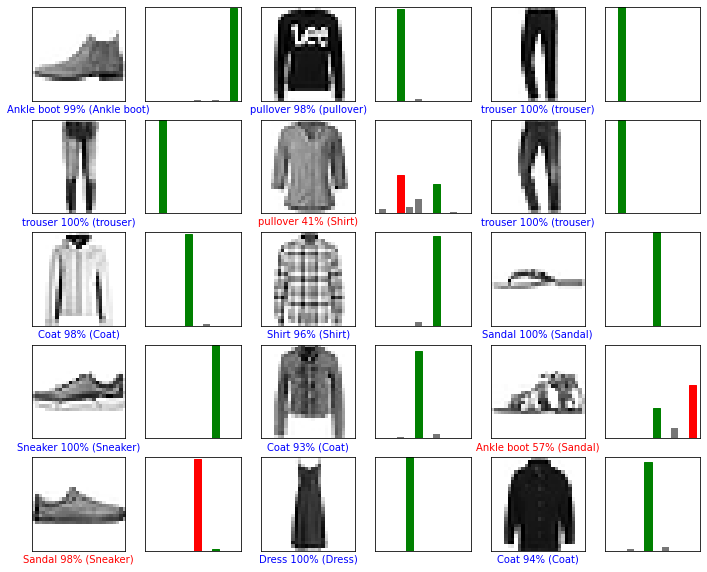

(28, 28)
(1, 28, 28)
[[6.1277078e-24 1.9183865e-19 0.0000000e+00 1.0976595e-20 0.0000000e+00
  6.4964336e-03 2.3350800e-23 5.5450057e-03 5.5764753e-14 9.8795855e-01]]
9


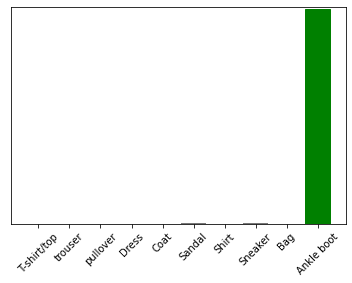

In [1]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label]), color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim(0, 1)
    predicted_label = np.argmax(predictions_array)

    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('green')


i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(1 * num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

img = test_images[0]
print(test_images[0].shape)

img = np.expand_dims(img, 0)
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)

print(np.argmax(predictions_single[0]))



In [2]:
print()